In [1]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.9 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=1912614ce8e00d55e51614b5b9411e17468f69222ae870e2e74c7c0b23e0ce82
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
from sentence_transformers import SentenceTransformer, models

In [5]:
df = pd.read_csv('/content/drive/MyDrive/test.csv', index_col=0)

In [6]:
from tqdm.notebook import tqdm

In [7]:
df.sample(10)

,Ids,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description,...,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,years,city,education
2066439,49973739,Рексофт,системный аналитик,False,NaN,NaN,Более 6 лет,Удаленная работа,"['XML', 'BPMN', 'UML', 'SQL', 'REST', 'SOAP', ...",«Рексофт» - один из ведущих российских разрабо...,...,полный день,Опыт работы 12 лет 7 месяцев Июнь 2017 — по н...,"ООО ""Пласт Групп+""",Руководитель проектного отдела,Высшее образование 2011 Санкт-Петербургский Го...,07.05.2019 12:36,Не указано,12.0,Санкт-Петербург,Высшее образование
3305952,49754037,"Иннотех, Группа компаний",архитектор,False,NaN,NaN,От 3 до 6 лет,Удаленная работа,"['Big Data', 'Python', 'Hadoop', 'PostgreSQL',...",В нашу дружную команду ищем Архитектора (Sol...,...,полный день,"Опыт работы 13 лет 4 месяца Архитектор, Team ...",Сбербанк - Технологии (Россия),Директор Центра (IT Area Lead),Высшее образование 2006 Воронежский государств...,19.07.2018 16:11,Не указано,13.0,Москва,Высшее образование
2225905,49946140,Финэктор Групп,системный администратор,True,60000.0,NaN,Нет опыта,Удаленная работа,"['Администрирование', 'Консультирование', 'Lin...",Финэктор Групп – компания специализируется на ...,...,полный день,Опыт работы 2 года 9 месяцев Сентябрь 2016 — ...,ООО сервис+,Сервисный инженер по ремонту компьютеров,Неоконченное высшее образование 2020 Орловски...,07.04.2019 09:58,Не указано,2.0,Москва,Неоконченное высшее образование
4072045,49435450,Идеальный турник,seo-специалист,True,NaN,100000.0,От 3 до 6 лет,Удаленная работа,"['Копирайтинг', 'Составление семантического яд...",Мы - компания Идеальный турник. Мы доставляем ...,...,"гибкий график, полный день, сменный график, уд...","Опыт работы 14 лет 11 месяцев SEO-специалист,...","Фрилансер: seo-специалист, помощник по контекс...","SEO-специалист, помощник по контекстной рекламе",Высшее образование 2015 Региональный финансово...,26.04.2019 15:33,Не указано,14.0,Ульяновск,Высшее образование
36918,49790971,Интроверт,менеджер по продажам,True,50000.0,NaN,Нет опыта,Удаленная работа,"['amoCRM', 'B2B Продажи', 'Работа в команде', ...",Привет! Меня зовут Ирина Чехова и я руководите...,...,полный день,Опыт работы 9 лет 7 месяцев Апрель 2013 — Июн...,Сеть цифровых супермаркетов DNS,Заместитель директора магазина,Неоконченное высшее образование 2011 ИНЕКА АСУ...,14.05.2019 20:21,Имеется собственный автомобиль,9.0,Октябрьский (Республика Башкортостан),Неоконченное высшее образование
392728,50054036,Бэнкс Софт Системс,руководитель проектов,False,NaN,NaN,От 3 до 6 лет,Удаленная работа,[],Компания BSS основана в 1994 году и сейчас за...,...,полный день,Опыт работы 12 лет 7 месяцев Август 2016 — по...,"АО ""ЭнергосбытПлюс""",Руководитель направления технической поддержки...,Высшее образование 2006 УрФУ им. Б. Н. Ельцина...,18.04.2019 13:37,Не указано,12.0,Екатеринбург,Высшее образование
3807721,49512752,Крупная сеть кафе-кондитерских.,системный администратор,False,NaN,NaN,От 1 года до 3 лет,Удаленная работа,"['Администрирование сетевого оборудования', 'А...",Крупная сеть кафе-кондитерских в поисках систе...,...,"удаленная работа, гибкий график, полный день",Опыт работы 25 лет 9 месяцев Системный админи...,ИП Скороходов А.Н.,Программист,Высшее образование 1992 Днепропетровский химик...,27.04.2019 19:06,Не указано,25.0,Вологда,Высшее образование
2893621,49838612,МАГ- швейная фурнитура,программист 1c,False,NaN,NaN,От 1 года до 3 лет,Удаленная работа,"['1С: Управление Торговлей', '1С: Бухгалтерия']",Обязанности: Доработка функционала УТ 11.4 по...,...,"полный день, удаленная работа",Опыт работы 6 лет 4 месяца Февраль 2018 — по ...,"ОсОО ""Кондитерский дом ""Куликовский""",Инженер программист 1С,Высшее образование 2016 КГТУ им. И. Раззакова(...,20.04.2019 17:55,Не указано,6.0,Бишкек,Высшее образование
4380795,45997574,Экспобанк,системный аналитик,False,NaN,NaN,От 3 до 6 лет,Удаленная работа,"['Грамотность', 'Системное мышление', 

In [8]:
df.columns

Index(['Ids', 'Employer', 'Name', 'Salary', 'From', 'To', 'Experience',
       'Schedule', 'Keys', 'Description', 'Area', 'Professional roles',
       'Specializations', 'Profarea names', 'Published at', 'min_years',
       'index', 'Пол, возраст', 'ЗП', 'Ищет работу на должность:',
       'Город, переезд, командировки', 'Занятость', 'График', 'Опыт работы',
       'Последнее/нынешнее место работы', 'Последняя/нынешняя должность',
       'Образование и ВУЗ', 'Обновление резюме', 'Авто', 'years', 'city',
       'education'],
      dtype='object')

In [9]:
df['Keys'] = df['Keys'].apply(eval)

In [10]:
df['skills'] = df['Keys'].apply(lambda x: 'Требуемые навыки: ' + ', '.join(x))

In [11]:
df['Specializations'] = df['Specializations'].apply(eval)

In [12]:
df['Specializations'] = df['Specializations'].apply(lambda x: ', '.join(x))

In [13]:
df['job_description'] = df['Description'] + ' ' +  df['skills'] + ' ' + df['Specializations'] + '. Требуемый опыт:' + df['Experience']

In [14]:
df['resume_description'] = 'Ищет работу на должность: ' + df['Ищет работу на должность:'] +' ' + df['Опыт работы'] + ' ' + df['Образование и ВУЗ']

In [15]:
df['resume_description']

1014172    Ищет работу на должность: аналитик Опыт работы...
1836857    Ищет работу на должность: web-разработчик Опыт...
3957073    Ищет работу на должность: seo-специалист Опыт ...
2253291    Ищет работу на должность: бизнес-аналитик Опыт...
1635868    Ищет работу на должность: специалист техническ...
                                 ...                        
2466197    Ищет работу на должность: системный аналитик О...
730291     Ищет работу на должность: программист 1с Опыт ...
454010     Ищет работу на должность: системный аналитик О...
658250     Ищет работу на должность: программист 1c Опыт ...
2999339    Ищет работу на должность: тестировщик по Опыт ...
Name: resume_description, Length: 23515, dtype: object

In [16]:
df['job_description']

1014172    Медлинкс – медицинская IT компания, которая ра...
1836857    Требуемый опыт работы: от 2-ух летПолная занят...
3957073    Newmen основан в 1999 году. Мы создаем медиа д...
2253291    Одна из крупнейших международных компаний, зан...
1635868    Важно: не рассматриваем соискателей без знания...
                                 ...                        
2466197    Мы разрабатываем новый продукт - Единый сервис...
730291     Обязанности:   Внедрение новых, поддержание и ...
454010     Обязанности:  Проведение предпроектных обследо...
658250     Первый Бит – международный интегратор эффектив...
2999339    Мы, российская финтех компания, работающая 15 ...
Name: job_description, Length: 23515, dtype: object

# Compute metrics

In [17]:
def get_base_model(model_path):
    model = SentenceTransformer(model_path)

    return model


In [18]:
import numpy as np

from numpy import dot
from numpy.linalg import norm


def compute_similarity(a, b):
    a, b = np.array(a.to_list()), np.array(b.to_list())
    cos_sim = a @ b.T

    out = np.zeros(cos_sim.shape,dtype=bool)
    np.fill_diagonal(out,1)

    return cos_sim[out]

def sample_negative(job_idx):
    return df[df['Ids']!=job_idx].sample(1)['job_emb'].item()

def sample_negative(job_idx):
    return df[df['Ids']!=job_idx].sample(1)['job_emb'].item()

# distiluse-base-multilingual-cased-v1

In [19]:
from tqdm import tqdm

tqdm.pandas()

In [20]:
model = get_base_model('/content/drive/MyDrive/ce_model')

In [21]:
model.to('cuda')

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: DistilBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Dense({'in_features': 768, 'out_features': 512, 'bias': True, 'activation_function': 'torch.nn.modules.activation.Tanh'})
)

In [22]:
model.eval()

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: DistilBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Dense({'in_features': 768, 'out_features': 512, 'bias': True, 'activation_function': 'torch.nn.modules.activation.Tanh'})
)

In [23]:
import torch

with torch.no_grad():
  lst = model.encode(df['job_description'].to_list(), show_progress_bar=True, batch_size=1512, normalize_embeddings=True)

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

In [24]:
import torch

with torch.no_grad():
  lst_1 = model.encode(df['resume_description'].to_list(), show_progress_bar=True, batch_size=1512, normalize_embeddings=True)

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

In [25]:
df['job_emb'] = lst.tolist()
df['resume_emb'] = lst_1.tolist()

In [26]:
df['job_emb']

1014172    [-0.05722927674651146, 0.11009319126605988, -0...
1836857    [0.018342670053243637, 0.05488794669508934, -0...
3957073    [-0.058502037078142166, -0.02372795157134533, ...
2253291    [-0.06890839338302612, -0.07134146243333817, -...
1635868    [-0.05301650986075401, 0.010949118062853813, 0...
                                 ...                        
2466197    [-0.024830376729369164, -0.024435948580503464,...
730291     [-0.0023077449295669794, -0.06814883649349213,...
454010     [-0.04672450199723244, 0.019493063911795616, -...
658250     [-0.0004417236486915499, -0.12633119523525238,...
2999339    [-0.0789838656783104, -0.031571149826049805, 0...
Name: job_emb, Length: 23515, dtype: object

In [27]:
df['job_emb'] = df['job_emb'].apply(lambda x: np.array(x, dtype=np.float32)).to_numpy()
df['resume_emb'] = df['resume_emb'].apply(lambda x: np.array(x, dtype=np.float32)).to_numpy()

In [28]:
df['job_emb'].to_numpy().shape

(23515,)

In [30]:
df = df.rename(columns={'index': 'resume_id'})

In [29]:
df.columns

Index(['Ids', 'Employer', 'Name', 'Salary', 'From', 'To', 'Experience',
       'Schedule', 'Keys', 'Description', 'Area', 'Professional roles',
       'Specializations', 'Profarea names', 'Published at', 'min_years',
       'index', 'Пол, возраст', 'ЗП', 'Ищет работу на должность:',
       'Город, переезд, командировки', 'Занятость', 'График', 'Опыт работы',
       'Последнее/нынешнее место работы', 'Последняя/нынешняя должность',
       'Образование и ВУЗ', 'Обновление резюме', 'Авто', 'years', 'city',
       'education', 'skills', 'job_description', 'resume_description',
       'job_emb', 'resume_emb'],
      dtype='object')

In [234]:
stop_names = [
'2d-художник',
'3d-моделлер',
'account manager',
'data scientist',
'account manager',
 'full stack developer',
 'sql',
 'team lead',
  'администратор проектов',
 'администратор сайта',
 'аккаунт менеджер',
 'аккаунт-менеджер',
  'арт-директор',
 'архитектор',
 'аналитик',
 'ведущий программист',
 'дизайнер',
 'ведущий специалист',
 'главный специалист',
  'инженер кипиа',
 'копирайтер',
 'маркетолог',
 'менеджер интернет-магазина',
 'оператор видеонаблюдения',
 'оператор пк',
 'программист delphi',
  'тимлид',
 'трафик-менеджер',
'программист sql',
'специалист по информационной безопасности',
'специалист',
'стажер',
 'таргетолог',
'маркетолог',
'модератор',
'модератор сайта',
'it',
'junior developer',
'key account manager',
 'администратор',
'аналитик 1с'
]

In [229]:
df = df[(~df['Name'].isin(stop_names))&(~df['Ищет работу на должность:'].isin(stop_names))]

In [230]:
df_job = df.drop_duplicates(['Ids'])
df_resume = df.drop_duplicates(['resume_id'])

In [231]:
df_job

,Ids,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description,...,Обновление резюме,Авто,years,city,education,skills,job_description,resume_description,job_emb,resume_emb
1836857,49772558,СЕО-Импульс,web-разработчик,True,60900.0,NaN,От 1 года до 3 лет,Удаленная работа,"[MySQL, JavaScript, 1С-Битрикс, CSS, PHP, HTML]",Требуемый опыт работы: от 2-ух летПолная занят...,...,28.11.2018 00:25,Не указано,16.0,Москва,Высшее образование,"Требуемые навыки: MySQL, JavaScript, 1С-Битрик...",Требуемый опыт работы: от 2-ух летПолная занят...,Ищет работу на должность: web-разработчик Опыт...,"[0.01834267, 0.054887947, -0.033110864, -0.038...","[0.043128338, 0.06638644, -0.03800491, 0.00420..."
3957073,49468328,Newmen,seo-специалист,False,NaN,NaN,От 3 до 6 лет,Удаленная работа,"[Составление семантического ядра, SEO оптимиза...",Newmen основан в 1999 году. Мы создаем медиа д...,...,09.04.2019 17:06,Не указано,6.0,Москва,Высшее образование,Требуемые навыки: Составление семантического я...,Newmen основан в 1999 году. Мы создаем медиа д...,Ищет работу на должность: seo-специалист Опыт ...,"[-0.058502037, -0.023727952, 0.016703524, -0.0...","[-0.0068638828, 0.023455892, 0.016091935, 0.03..."
2253291,49941763,ANCOR,бизнес-аналитик,False,NaN,NaN,От 1 года до 3 лет,Удаленная работа,[],"Одна из крупнейших международных компаний, зан...",...,11.04.2019 18:47,Не указано,3.0,Санкт-Петербург,Высшее образование,Требуемые навыки:,"Одна из крупнейших международных компаний, зан...",Ищет работу на должность: бизнес-аналитик Опыт...,"[-0.06890839, -0.07134146, -0.002717178, 0.007...","[0.011419696, -0.026925357, 0.015391138, 0.049..."
1635868,49954520,AmoPoint,специалист технической поддержки,True,30000.0,45000.0,От 1 года до 3 лет,Удаленная работа,"[Телефонные переговоры, CRM, Управление отноше...",Важно: не рассматриваем соискателей без знания...,...,14.05.2019 14:16,Не указано,9.0,Москва,Высшее образование,"Требуемые навыки: Телефонные переговоры, CRM, ...",Важно: не рассматриваем соискателей без знания...,Ищет работу на должность: специалист техническ...,"[-0.05301651, 0.010949118, 0.026741687, -0.010...","[-0.019447438, 0.019423781, 0.00040931944, 0.0..."
2444350,49914012,Самокат (ООО Умный ритейл),руководитель проектов,False,NaN,NaN,От 3 до 6 лет,Удаленная работа,"[Управление проектами, MS Visio, Бизнес-анализ...",ПРИГЛАШАЕМ В КОМАНДУ РУКОВОДИТЕЛЯ ПРОЕКТОВ В О...,...,22.04.2019 13:06,Имеется собственный автомобиль,8.0,Москва,Высшее образование,"Требуемые навыки: Управление проектами, MS Vis...",ПРИГЛАШАЕМ В КОМАНДУ РУКОВОДИТЕЛЯ ПРОЕКТОВ В О...,Ищет работу на должность: руководитель проекто...,"[-0.036336493, 0.041616235, -0.0011543928, 0.0...","[-0.008652095, 0.050060406, -0.023184095, 0.03..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216230,49412964,Инсайд,junior java developer,True,70000.0,110000.0,От 1 года до 3 лет,Удаленная работа,"[Git, Java, MySQL]",Описание работодателя: Наша команда разрабатыв...,...,14.05.2019 07:17,Не указано,4.0,Новосибирск,Высшее образование,"Требуемые навыки: Git, Java, MySQL",Описание работодателя: Наша команда разрабатыв...,Ищет работу на должность: junior java develope...,"[-0.044722464, 0.07815471, -0.025517626, -0.01...","[0.025988016, 0.051947005, -0.069299184, -0.00..."
1130964,47472942,Билайн,ios разработчик,False,NaN,NaN,От 1 года до 3 лет,Удаленная работа,"[Objective-C, iOS, Управление временем, Мобиль...",«Билайн» сейчас – компания изменений. В 2020 м...,...,07.05.2019 13:42,Имеется собственный автомобиль,9.0,Долгопрудный,Высшее образование,"Требуемые навыки: Objective-C, iOS, Управление...",«Билайн» сейчас – компания изменений. В 2020 м...,Ищет работу на должность: ios разработчик Опыт...,"[-0.042397663, 0.013907033, -0.039918352, 0.02...","[0.039305385, 0.058626212, 0.0022918256, 0.029..."
1296824,49411356,Информатика и Сервис,веб-программист,True,87000.0,NaN,От 1 года до 3 лет,Удаленная работа,"[1С-Битрикс, jQuery, MySQL, PHP5, CSS3, Git, H...",«Информат

In [232]:
df_resume = df_resume.rename(columns={'Ищет работу на должность:': 'real_name'})

In [233]:
def compute_precision(df_job, df_resume):
  similarities = (torch.tensor(df_job['job_emb'].to_list()) @ torch.tensor(df_resume['resume_emb'].to_list()).T)

  top_idx = similarities.topk(10, dim=1).indices.tolist()
  df_job['matched_cv'] = top_idx

  df_job = df_job.explode('matched_cv')
  df_resume = df_resume.reset_index(drop=True)

  df_job = df_job.merge(df_resume['real_name'], left_on='matched_cv', right_index=True, how='left')

  return (df_job['Name']==df_job['real_name']).sum() / len(df_job)


In [235]:
mapping = {
    'android developer': 'android разработчик',
    'business analyst': 'бизнес-аналитик',
    'бизнес аналитик': 'бизнес-аналитик',
    'аналитик бизнес-процессов': 'бизнес-аналитик',
    'devops engineer': 'devops',
    'devops инженер': 'devops',
    'c#': 'программист c#',
    '.net разработчик': 'программист c#',
    'front-end developer': 'frontend developer',
    'front-end разработчик':'frontend developer',
    'frontend developer':'frontend developer',
    'frontend разработчик':'frontend developer',
    'frontend-разработчик': 'frontend developer',
    'js': 'frontend developer',
    'junior frontend developer': 'frontend developer',
    'junior frontend-разработчик': 'frontend developer',
    'html-верстальщик': 'веб-дизайнер',
    'web-мастер': 'веб-дизайнер',
    'python developer': 'python developer',
    'python': 'python developer',
    'python developer': 'python developer',
    'python разработчик': 'python developer',
    'junior python developer': 'python developer',
    'программист python': 'python developer',
    'разработчик python': 'python developer',
    'php': 'php developer',
    'php программист': 'php developer',
    'php-программист': 'php developer',
    'php-разработчик': 'php developer',
    'junior java developer': 'java developer',
    'java': 'java developer',
    'java-разработчик': 'java developer',
    'программист java': 'java developer',
    'программист oracle': 'java developer',
    'it project manager': 'project manager',
    'it менеджер': 'project manager',
    'it-менеджер': 'project manager',
    'координатор проекта': 'project manager',
    'координатор проектов': 'project manager',
    'менеджер it-проектов': 'project manager',
    'помощник менеджера проекта': 'project manager',
    'product owner': 'product manager',
    'проектный менеджер': 'project manager',
    'менеджер проекта': 'project manager',
    'менеджер проектов': 'project manager',
    'qa automation engineer': 'qa engineer',
    'qa инженер': 'qa engineer',
    'web разработчик': 'web-разработчик',
    'веб-программист': 'web-разработчик',
    'веб-разработчик': 'web-разработчик',
    'web-программист': 'web-разработчик',
    'seo-оптимизатор': 'seo-специалист',
    'помощник seo-специалиста': 'seo-специалист',
    'тестировщик': 'тестировщик',
    'тестировщик игр': 'тестировщик',
    'тестировщик по': 'тестировщик',
    'тестировщик программного обеспечения': 'тестировщик',
    'веб-дизайнер': 'web-дизайнер',
    'веб-мастер': 'web-дизайнер',
    'верстальщик': 'web-дизайнер',
    'графический дизайнер': 'web-дизайнер',
    'графический дизайнер': 'web-дизайнер',
    'дизайнер интерфейсов': 'web-дизайнер',
    'ведущий аналитик': 'аналитик',
    'ведущий бизнес-аналитик': 'бизнес-аналитик',
    'ведущий инженер': 'инженер',
    'ведущий программист 1с': 'программист 1с',
    'ведущий разработчик': 'разработчик',
    'ведущий системный администратор': 'системный администратор',
    'ведущий системный аналитик': 'системный аналитик',
    'аналитик отдела продаж': 'аналитик',
    'qa engineer': 'инженер по тестированию',
    'консультант 1с': 'консультант 1c',
    'программист 1c': 'программист 1с',
    'программист 1c': 'программист 1с',
    'системный администратор':'системный администратор',
    'системный администратор linux': 'системный администратор',
    'системный администратор windows': 'системный администратор',
    'старший системный администратор': 'системный администратор'
}

In [236]:
df_job['Name'] = df_job['Name'].replace(mapping)
df_resume['real_name'] = df_resume['real_name'].replace(mapping)

<ipython-input-236-0047aecb1fd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job['Name'] = df_job['Name'].replace(mapping)


In [237]:
compute_precision(df_job, df_resume)

<ipython-input-233-0276c903c651>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job['matched_cv'] = top_idx


0.5523247744621791

In [ ]:
df['positive_score'] = compute_similarity(lst, lst_1)

<Axes: >

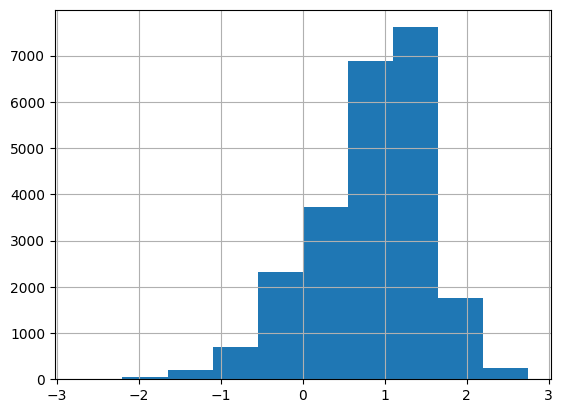

In [ ]:
df['positive_score'].hist()

In [ ]:
df['negative_job_emb'] = df['Ids'].progress_apply(sample_negative)

In [ ]:
df['negative_score'] = compute_similarity(df['negative_job_emb'], df['resume_emb'])

<Axes: >

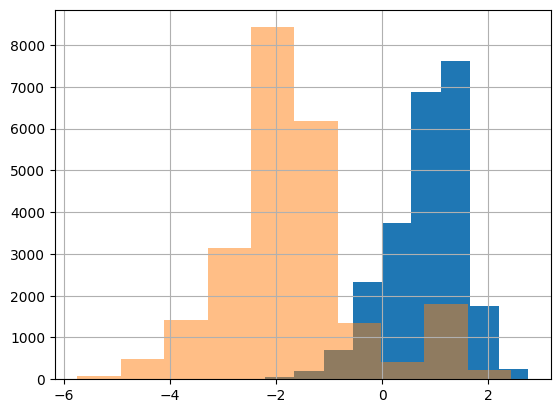

In [ ]:
df['positive_score'].hist()
df['negative_score'].hist(alpha=0.5)

In [ ]:
print(f'Positive score: {df["positive_score"].mean()}')

Positive score: 0.8512410521507263


In [ ]:
print(f'Negative score: {df["negative_score"].mean()}')

Negative score: -1.691119506568501


# all-mpnet-base-v2

In [238]:
model = get_base_model('all-mpnet-base-v2')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [239]:
model.to('cuda')

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [240]:
df['job_emb'] = df['job_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

100%|██████████| 20695/20695 [10:58<00:00, 31.42it/s]


In [241]:
df['resume_emb'] = df['resume_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

100%|██████████| 20695/20695 [12:34<00:00, 27.44it/s]


In [242]:
df_job = df.drop_duplicates(['Ids'])
df_resume = df.drop_duplicates(['resume_id'])

df_resume = df_resume.rename(columns={'Ищет работу на должность:': 'real_name'})

In [243]:
df_job['Name'] = df_job['Name'].replace(mapping)
df_resume['real_name'] = df_resume['real_name'].replace(mapping)

<ipython-input-243-0047aecb1fd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job['Name'] = df_job['Name'].replace(mapping)


In [244]:
compute_precision(df_job, df_resume)

<ipython-input-233-0276c903c651>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job['matched_cv'] = top_idx


0.24531575294934074

In [ ]:
df['positive_score'] = compute_similarity(df['job_emb'], df['resume_emb'])

<Axes: >

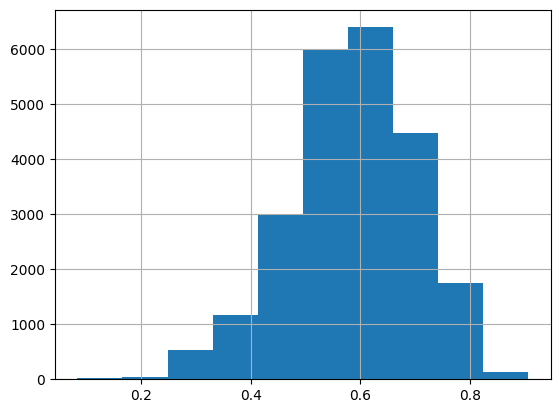

In [ ]:
df['positive_score'].hist()

In [ ]:
df['negative_job_emb'] = df['Ids'].apply(sample_negative)

In [ ]:
df['negative_score'] = compute_similarity(df['negative_job_emb'], df['resume_emb'])

<Axes: >

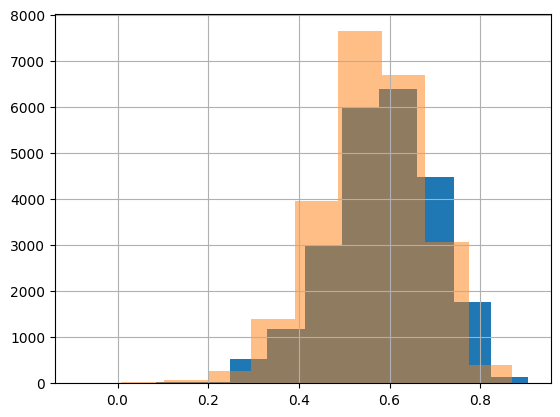

In [ ]:
df['positive_score'].hist()
df['negative_score'].hist(alpha=0.5)

In [ ]:
print(f'Positive score: {df["positive_score"].mean()}')

Positive score: 0.5848382711410522


In [ ]:
print(f'Negative score: {df["negative_score"].mean()}')

Negative score: 0.5592855215072632


# paraphrase-multilingual-MiniLM-L12-v2

In [245]:
model = get_base_model('paraphrase-multilingual-MiniLM-L12-v2')

.gitattributes:   0%|          | 0.00/968 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

unigram.json:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [246]:
model.to('cuda')

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [247]:
df['job_emb'] = df['job_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

100%|██████████| 20695/20695 [04:57<00:00, 69.67it/s]


In [248]:
df['resume_emb'] = df['resume_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

100%|██████████| 20695/20695 [06:33<00:00, 52.60it/s]


In [250]:
df_job = df.drop_duplicates(['Ids'])
df_resume = df.drop_duplicates(['resume_id'])

df_resume = df_resume.rename(columns={'Ищет работу на должность:': 'real_name'})

In [251]:
df_job['Name'] = df_job['Name'].replace(mapping)
df_resume['real_name'] = df_resume['real_name'].replace(mapping)

<ipython-input-251-0047aecb1fd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job['Name'] = df_job['Name'].replace(mapping)


In [252]:
compute_precision(df_job, df_resume)

<ipython-input-233-0276c903c651>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job['matched_cv'] = top_idx


0.2480916030534351

In [249]:
df['positive_score'] = compute_similarity(df['job_emb'], df['resume_emb'])

<Axes: >

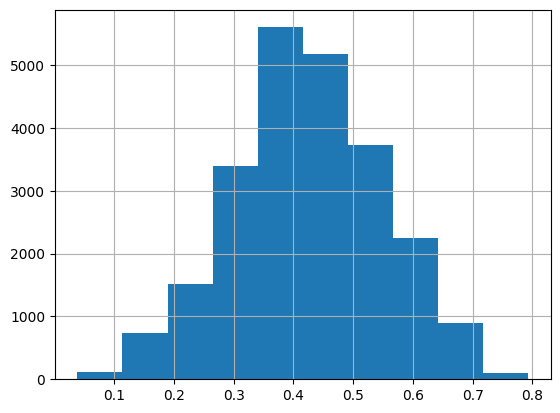

In [ ]:
df['positive_score'].hist()

In [ ]:
df['negative_job_emb'] = df['Ids'].apply(sample_negative)

In [ ]:
df['negative_score'] = compute_similarity(df['negative_job_emb'], df['resume_emb'])

<Axes: >

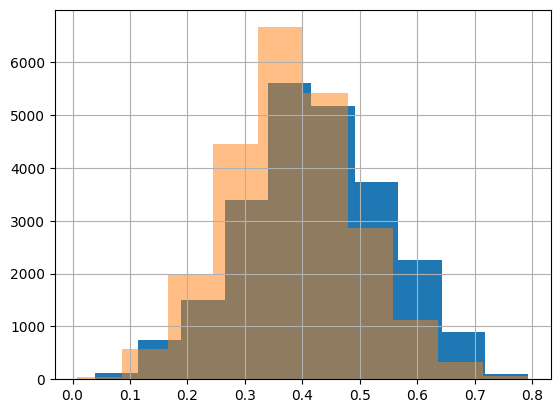

In [ ]:
df['positive_score'].hist()
df['negative_score'].hist(alpha=0.5)

In [ ]:
print(f'Positive score: {df["positive_score"].mean()}')

Positive score: 0.42383575439453125


In [ ]:
print(f'Negative score: {df["negative_score"].mean()}')

Negative score: 0.3811571002006531


# distiluse-base-multilingual-cased-v2

In [253]:
model = get_base_model('distiluse-base-multilingual-cased-v2')

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

In [254]:
model.to('cuda')

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: DistilBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Dense({'in_features': 768, 'out_features': 512, 'bias': True, 'activation_function': 'torch.nn.modules.activation.Tanh'})
)

In [255]:
df['job_emb'] = df['job_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

100%|██████████| 20695/20695 [03:08<00:00, 109.94it/s]


In [256]:
df['resume_emb'] = df['resume_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

100%|██████████| 20695/20695 [04:26<00:00, 77.69it/s]


In [257]:
df_job = df.drop_duplicates(['Ids'])
df_resume = df.drop_duplicates(['resume_id'])

df_resume = df_resume.rename(columns={'Ищет работу на должность:': 'real_name'})

In [258]:
df_job['Name'] = df_job['Name'].replace(mapping)
df_resume['real_name'] = df_resume['real_name'].replace(mapping)

<ipython-input-258-0047aecb1fd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job['Name'] = df_job['Name'].replace(mapping)


In [259]:
compute_precision(df_job, df_resume)

<ipython-input-233-0276c903c651>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job['matched_cv'] = top_idx


0.2477446217904233

In [ ]:
df['positive_score'] = compute_similarity(df['job_emb'], df['resume_emb'])

<Axes: >

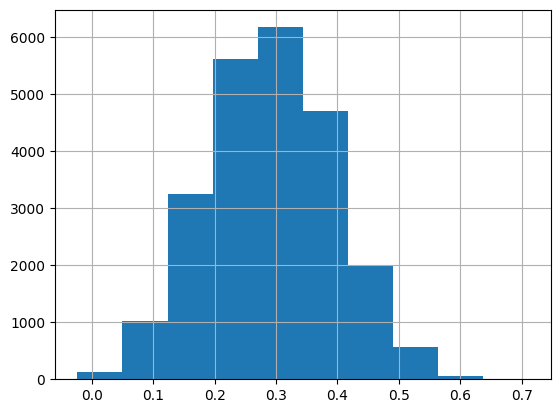

In [ ]:
df['positive_score'].hist()

In [ ]:
df['negative_job_emb'] = df['Ids'].apply(sample_negative)

In [ ]:
df['negative_score'] = compute_similarity(df['negative_job_emb'], df['resume_emb'])

<Axes: >

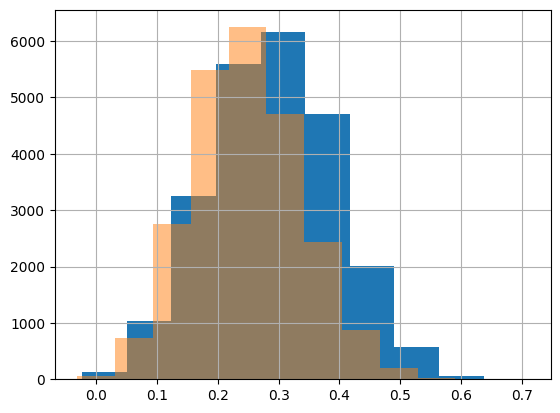

In [ ]:
df['positive_score'].hist()
df['negative_score'].hist(alpha=0.5)

In [ ]:
print(f'Positive score: {df["positive_score"].mean()}')

Positive score: 0.2911510467529297


In [ ]:
print(f'Negative score: {df["negative_score"].mean()}')

Negative score: 0.24776485562324524


# MiniLM-MultipleNegativesRankingLoss

In [262]:
!unrar x /content/drive/MyDrive/minilmv2_100k.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/minilmv2_100k.rar

Creating    minilmv2_100k                                             OK
Creating    minilmv2_100k/1_Pooling                                   OK
Extracting  minilmv2_100k/1_Pooling/config.json                            0%  OK 
Extracting  minilmv2_100k/config.json                                      0%  OK 
Extracting  minilmv2_100k/config_sentence_transformers.json                0%  OK 
Extracting  minilmv2_100k/model.safetensors                                5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 99%  OK 
Extracting  minilmv2_100k/modules.json                                    99%  OK 
Extracting  minilmv2_100k/README.md                                       99%  OK 
Extracting  mini

In [263]:
model = get_base_model('/content/minilmv2_100k')

In [264]:
model.to('cuda')

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [265]:
df['job_emb'] = df['job_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

100%|██████████| 20695/20695 [03:49<00:00, 90.02it/s]


In [266]:
df['resume_emb'] = df['resume_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

100%|██████████| 20695/20695 [06:39<00:00, 51.80it/s]


In [267]:
df_job = df.drop_duplicates(['Ids'])
df_resume = df.drop_duplicates(['resume_id'])

df_resume = df_resume.rename(columns={'Ищет работу на должность:': 'real_name'})

In [268]:
df_job['Name'] = df_job['Name'].replace(mapping)
df_resume['real_name'] = df_resume['real_name'].replace(mapping)

<ipython-input-268-0047aecb1fd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job['Name'] = df_job['Name'].replace(mapping)


In [269]:
compute_precision(df_job, df_resume)

<ipython-input-233-0276c903c651>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job['matched_cv'] = top_idx


0.5043719639139487

In [ ]:
df['positive_score'] = compute_similarity(df['job_emb'], df['resume_emb'])

<Axes: >

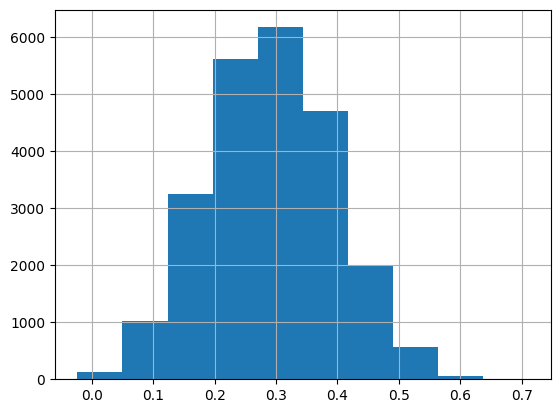

In [ ]:
df['positive_score'].hist()

In [ ]:
df['negative_job_emb'] = df['Ids'].apply(sample_negative)

In [ ]:
df['negative_score'] = compute_similarity(df['negative_job_emb'], df['resume_emb'])

<Axes: >

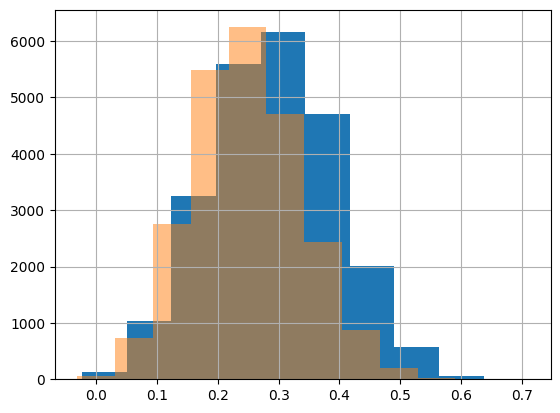

In [ ]:
df['positive_score'].hist()
df['negative_score'].hist(alpha=0.5)

In [ ]:
print(f'Positive score: {df["positive_score"].mean()}')

Positive score: 0.2911510467529297


In [ ]:
print(f'Negative score: {df["negative_score"].mean()}')

Negative score: 0.24776485562324524


# Doc2Vec

In [270]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [271]:
model = Doc2Vec.load('cv_job_maching_best.model')

In [273]:
def infer_vector(text):
    return model.infer_vector(word_tokenize(text.lower()))

df['job_emb'] = df['job_description'].progress_apply(lambda x: infer_vector(x) / 10)

100%|██████████| 20695/20695 [06:58<00:00, 49.44it/s]


In [274]:
df['resume_emb'] = df['resume_description'].progress_apply(lambda x: infer_vector(x)/ 10)

100%|██████████| 20695/20695 [14:38<00:00, 23.56it/s]


In [275]:
df_job = df.drop_duplicates(['Ids'])
df_resume = df.drop_duplicates(['resume_id'])

df_resume = df_resume.rename(columns={'Ищет работу на должность:': 'real_name'})

In [277]:
df_job['Name'] = df_job['Name'].replace(mapping)
df_resume['real_name'] = df_resume['real_name'].replace(mapping)

<ipython-input-277-0047aecb1fd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job['Name'] = df_job['Name'].replace(mapping)


In [278]:
compute_precision(df_job, df_resume)

<ipython-input-233-0276c903c651>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job['matched_cv'] = top_idx


0.12074947952810548

In [276]:
df['positive_score'] = compute_similarity(df['job_emb'], df['resume_emb'])

<Axes: >

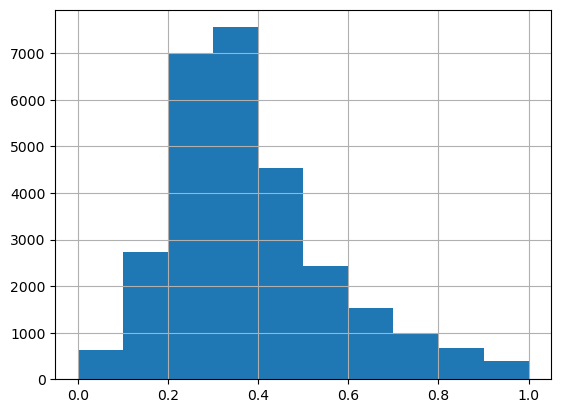

In [ ]:
df['positive_score'].hist(range=(0, 1))

In [ ]:
df.reset_index(inplace=True)

,Ids,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description,...,Авто,years,city,education,skills,job_description,resume_description,job_emb,resume_emb,positive_score
0,48957743,Адверт Лайн,системный администратор,True,160000.0,NaN,От 3 до 6 лет,Удаленная работа,"[devops, Nagios, Nginx, PHP, Администрирование...",Привет! Компания Advert Line объединяет в себе...,...,Имеется собственный автомобиль,16.0,Советск (Калининградская область),Неоконченное высшее образование,"Требуемые навыки: devops, Nagios, Nginx, PHP, ...",Привет! Компания Advert Line объединяет в себе...,Ищет работу на должность: системный администра...,"[-0.013222023, 0.0011656419, -0.0001581474, 0....","[-0.0053704595, 0.012372467, 0.008057717, -0.0...",0.003584
1,48957743,Адверт Лайн,системный администратор,True,160000.0,NaN,От 3 до 6 лет,Удаленная работа,"[devops, Nagios, Nginx, PHP, Администрирование...",Привет! Компания Advert Line объединяет в себе...,...,Не указано,9.0,Санкт-Петербург,Высшее образование,"Требуемые навыки: devops, Nagios, Nginx, PHP, ...",Привет! Компания Advert Line объединяет в себе...,Ищет работу на должность: системный администра...,"[-0.01761503, 0.00212222, 0.0014719031, 0.0158...","[-0.04493113, 0.0551534, -0.012480488, 0.02807...",0.006032
2,48957743,Адверт Лайн,системный администратор,True,160000.0,NaN,От 3 до 6 лет,Удаленная работа,"[devops, Nagios, Nginx, PHP, Администрирование...",Привет! Компания Advert Line объединяет в себе...,...,Не указано,3.0,Нижний Тагил,Неоконченное высшее образование,"Требуемые навыки: devops, Nagios, Nginx, PHP, ...",Привет! Компания Advert Line объединяет в себе...,Ищет работу на должность: системный администра...,"[-0.013569027, 0.0010985681, -0.000690619, 0.0...","[-0.001987497, 0.0062560434, 0.011738513, 0.00...",0.004131
3,48957743,Адверт Лайн,системный администратор,True,160000.0,NaN,От 3 до 6 лет,Удаленная работа,"[devops, Nagios, Nginx, PHP, Администрирование...",Привет! Компания Advert Line объединяет в себе...,...,Имеется собственный автомобиль,16.0,Москва,Высшее образование,"Требуемые навыки: devops, Nagios, Nginx, PHP, ...",Привет! Компания Advert Line объединяет в себе...,Ищет работу на должность: системный администра...,"[-0.014502432, -0.0005272706, 0.00038971633, 0...","[-0.01159224, 0.025736082, 0.00071032566, 0.00...",0.004612
4,48957743,Адверт Лайн,системный администратор,True,160000.0,NaN,От 3 до 6 лет,Удаленная работа,"[devops, Nagios, Nginx, PHP, Администрирование...",Привет! Компания Advert Line объединяет в себе...,...,Имеется собственный автомобиль,17.0,Красноярск,Высшее образование,"Требуемые навыки: devops, Nagios, Nginx, PHP, ...",Привет! Компания Advert Line объединяет в себе...,Ищет работу на должность: системный администра...,"[-0.016377715, -0.000108497974, -0.0022762239,...","[-0.042395167, 0.014429884, -0.007399044, 0.00...",0.004409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,50036543,АРГОС УЧЕТ,программист 1с,True,87000.0,NaN,От 1 года до 3 лет,Удаленная работа,"[1С программирование, 1С: Управление Торговлей...",Команда АРГОС уже 15 лет занимается регулярным...,...,Не указано,17.0,Северск(Томская область),Высшее образование,"Требуемые навыки: 1С программирование, 1С: Упр...",Команда АРГОС уже 15 лет занимается регулярным...,Ищет работу на должность: программист 1с Опыт ...,"[-0.027028851, 0.026582127, 0.00016063782, -0....","[-0.020368066, 0.034654666, -0.014767021, 0.01...",0.008962
29996,50036543,АРГОС УЧЕТ,программист 1с,True,87000.0,NaN,От 1 года до 3 лет,Удаленная работа,"[1С программирование, 1С: Управление Торговлей...",Команда АРГОС уже 15 лет занимается регулярным...,...,Не указано,9.0,Оренбург,Высшее образование,"Требуемые навыки: 1С программирование, 1С: Упр...",Команда АРГОС уже 15 лет занимается регулярным...,Ищет работу на должность: программист 1с Опыт ...,"[-0.027634485, 0.028488245, 0.001280609, -0.00...","[-0.06226613, 0.01671128, 0.0054754727, 0.0117...",0.007931
29997,50036543,АРГОС УЧЕТ,п

In [ ]:
df['negative_job_emb'] = df['Ids'].apply(sample_negative)

In [ ]:
df['negative_score'] = compute_similarity(df['negative_job_emb'], df['resume_emb'])

<Axes: >

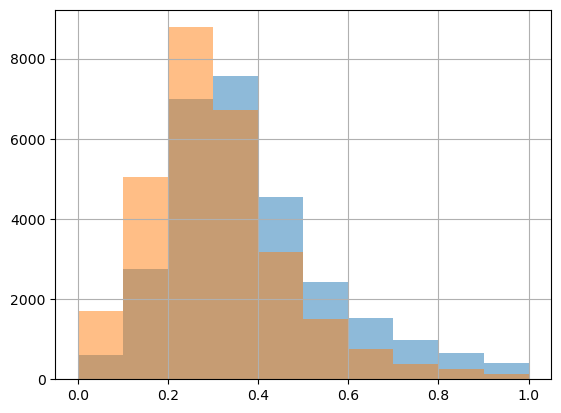

In [ ]:
df['positive_score'].hist(alpha=0.5, range=(0, 1))
df['negative_score'].hist(alpha=0.5, range=(0, 1))

In [ ]:
print(f'Positive score: {df["positive_score"].mean()}')

Positive score: 0.4147782027721405


In [ ]:
print(f'Negative score: {df["negative_score"].mean()}')

Negative score: 0.2989155054092407


In [ ]:
df["positive_score"].mean() -df["negative_score"].mean()

0.1158627